## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Approach


*  With being provided with two datasets,the first one containing the information regarding the details of the apps.The second dataset contains the information about user reviews of some of the apps in first dataset.
*   First it's required to explore the type of data present in the dataset and 
get the summary statistics of corresponding columns in the whole dataset.


*   Once we are able to understand the contents in each column , we can identify and handle Null and error values through data cleaning.
* The data will be cleaned after converting each columns to appropriate datatypes.


*   Using various data visualisation tools on both dataset we can get insights regarding kind of relation between each column and both datasets.
*   From this insights we derive conclusions that responsible for succes of an app 






#Exploring Datasets

In [128]:
#importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
#Reading the csv file.
df1=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')


In [131]:
# Viewing the top 10 rows of the dataframe
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [132]:
# Viewing the bottom 10 rows of the dataframe
df1.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [133]:
# Finding the number of rows and columns in the given dataset
df1.shape

(10841, 13)

In [134]:
#defining a function that would help in info regarding dtype, Null values ,Unique values
def get_info():
  df=pd.DataFrame(index=df1.columns)
  df['dtype']=df1.dtypes
  df['NUll Values']=df1.isnull().sum()
  df['Unique Values']=df1.nunique()
  return df


In [135]:
get_info()

,dtype,NUll Values,Unique Values
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


From the above observation it can be concluded that numeric datatype is only present in the rating column.So we need to convert other columns to appropriate datatype.

The first dataset contains 10841 rows and 13 columns.THe columns of the dataset will be explored to get insights.

**Let us first define what information the columns contain based on our inspection.**


* `App`: Contains the name of the apps.
* `Category`: It gives the category to the app.
* `Rating`: It contains the average rating the respective app received from its users.
* `Reviews`: It contains the number of users that have dropped a review for the respective app.
* `Size`: It contains the the disk space required to install the respective app.
* `Installs`: It gives the rounded figure of number of times the respective app was downloaded.
* `Type`: It states whether an app is free to use or paid.
* `Price`: It gives the price payable to install the app. For free type apps, the price is zero.
* `Content rating`: It states whether or not an app is suitable for all age groups or not.
* `Genres`: It gives the genre(s) to which the respective app belongs.
* `Last updated`: It gives the day in which the latest update was released.
* `Current Ver`: It gives the current version of the respective app.
* `Android Ver`: It gives the android version of the respective app.

In [136]:
#User review dataset
df2=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [137]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Let's go through each column in user review dataset and find out insights from it.**


1.   `App	`: Contains the name of apps.
2.   `Translated Review`: COntains reviews which are translated to English.


3.   `Sentiment`: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4.   `Sentiment_Polarity`:It gives the polarity of review.


5.   `Sentiment_Subjectivity`:Its the measure of how close the reviewrs opinion with public opinion.








# Cleaning Data

##Exploring playstore dataset.

###Removing the NaN values in playstore data




In [138]:
#Sorting the columns according to the number of missing values .
missing_data_values=df1.isnull().sum()
missing_data_values[missing_data_values != 0].sort_values(ascending=False)


Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
dtype: int64

Rating has the highest number of missing values(1474) , followed by Current version(8), Android version(3) , and one for Content rating and Type.

Lets first deal with the columns which contains  number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.


**1. `Type`: There is only one NaN value in this column.**

In [139]:
#Filling Nan value with mode.
df1['Type'].fillna('Free',inplace=True)



**2. `Content rating`: There is only one NaN value in this column.**

In [140]:
#Filling NaN values with mode.
df1['Content Rating'].fillna(df1['Content Rating'].mode(),inplace=True)



**3. `Rating`: There is 1474 NaN values in this column.**
Here we are removing outliers as well as filling the NaN values.

> Indented block




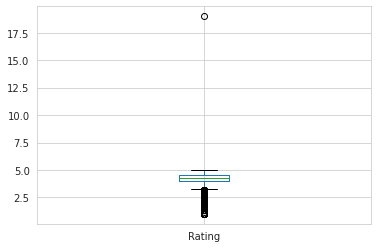

In [141]:
df1.boxplot()

From the plot we are getting ideas regarding outliers and have to remove those to clean the data.


In [142]:
#removing the outliers
df1[df1.Rating>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [143]:
df1.drop([10472],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


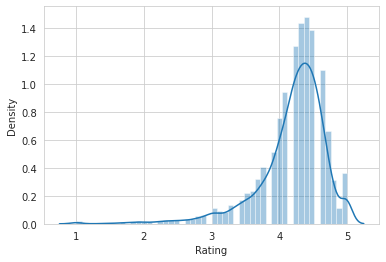

In [144]:
#Distribution plot to find the skewness of data in Rating column.
sns.distplot(df1['Rating'])

In [145]:
df1.Rating.fillna(df1.Rating.median(),inplace=True)

As the data is more skewed to right , median value is used to fill the Nan value.

**4:`Current Ver and Android Ver`- Handling the Nan Values.**

As the data present in both of the columns are not to be found that much useful , let's drop that two columns.

In [146]:
# The columns Current ver , Android Ver may not be useful ,so it can be dropped
df1.drop(['Current Ver','Android Ver'], axis=1,inplace=True)

###Handling the errors in each column.

Columns like Reviews,size,Installs and Price can have numeric datatype. So converting it from object to int.

 **1.   Converting Reviews from object to integer datatype**




In [147]:
#converting Reviews from object to int.
df1['Reviews'] = df1['Reviews'].astype('float64')


**2. Converting Size from object to numeric datatype**




In [148]:
#Finding out what kind of data to be changed into numeric values.
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [149]:
#converting size from object to numeric dataype.
df1["Size"]=df1["Size"].apply(lambda x : x.replace('M','e+6'))
df1["Size"]=df1["Size"].apply(lambda x : x.replace('k','e+3'))
df1["Size"]=df1["Size"].replace('Varies with device', '0')
df1["Size"]=df1["Size"].fillna('ffill')
df1['Size']=pd.to_numeric(df1['Size'])





**3. Converting Installs from object to numeric datatype**

In [150]:
#Stripping and removing the data.
df1['Installs']=df1.Installs.apply(lambda x:x.strip('+'))
df1['Installs']=df1.Installs.apply(lambda x:x.replace(',',''))







In [151]:
#Converting Installs from object to numeric datatype.
df1['Installs']=df1['Installs'].astype(float)
df1['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

**4.Converting Price from object to integer datatype**

In [152]:
#price
df1['Price'] = df1.Price.str.replace('$','').astype('float64')

**5.Converting Datatime from object to datetime datatype**

In [153]:
# The datetime.strptime funtion applied to the values in the last updated column to convert datatype from string to datetime
from datetime import datetime
df1['Last Updated'] = df1['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [154]:
get_info()

,dtype,NUll Values,Unique Values
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,float64,0,6001
Size,float64,0,460
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


##Exploring userreview datasets.

In [155]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [156]:
#Defining a function to identify the datatype , null values and unique values.
def get_info2():
  df=pd.DataFrame(index=df2.columns)
  df['dtype']=df2.dtypes
  df['NUll Values']=df2.isnull().sum()
  df['Not NUll Values']=df2.notnull().sum()
  df['Unique Values']=df2.nunique()
  return df


In [157]:
get_info2()

,dtype,NUll Values,Not NUll Values,Unique Values
App,object,0,64295,1074
Translated_Review,object,26868,37427,27994
Sentiment,object,26863,37432,3
Sentiment_Polarity,float64,26863,37432,6195
Sentiment_Subjectivity,float64,26863,37432,4530


###Removing NaN values in user review datasets.

As there are lot of null values.Its better to drop the rows having null values.


In [158]:
df2.dropna(axis=0 ,how='any',inplace=True)


###Handling the errors in each column.

The column named translated review is found of no use , let's drop that column.

In [159]:
df2.drop(['Translated_Review'] ,axis=1 ,inplace=True)


In [160]:
get_info2()

,dtype,NUll Values,Not NUll Values,Unique Values
App,object,0,37427,865
Sentiment,object,0,37427,3
Sentiment_Polarity,float64,0,37427,6195
Sentiment_Subjectivity,float64,0,37427,4530


#Data Visualisation


**1.Correlation between columns**

In [161]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.037086,0.045496,-0.019318
Reviews,0.063166,1.000000,0.065458,0.643122,-0.009667
Size,0.037086,0.065458,1.000000,-0.003457,-0.013457
Installs,0.045496,0.643122,-0.003457,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.013457,-0.011689,1.000000


Correlational matrix are used to find out the linear relationship between variables(columns).The values represent degree of relationship between variables.

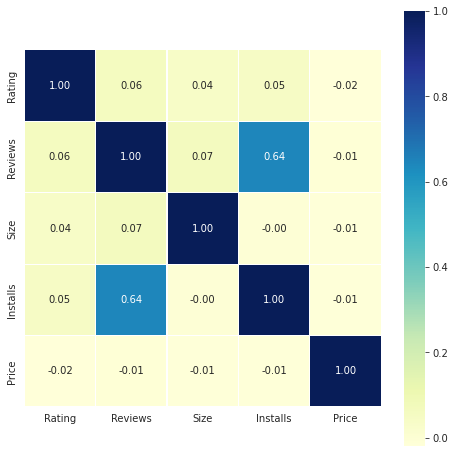

In [162]:
#Plotting correlational heatmap 
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df1.corr(),cmap="YlGnBu", ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

From the heatmap we can identify some key relations.


*   There is a strong positive correlation between `Reviews` and `Installs`,Suggesting that there are more number of `Reviews` corresponding to more number of `Installs`.
*   There is a negative correlation between `price`
all other values especially `Rating`.It suggest that as the price increaces the `Rating` ,no of `Reviews` ,`installs` decreases.
* the `Rating` is slightly positively correlated with the `Installs` and `Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.


 
**2. Popular categories of app by installation.**


In [163]:
label = df1['Category'].value_counts().index
size =df1['Category'].value_counts()
labels = []
sizes = []
for i in range(len(label)):
    labels.append(label[i])
    sizes.append(size[i])
  

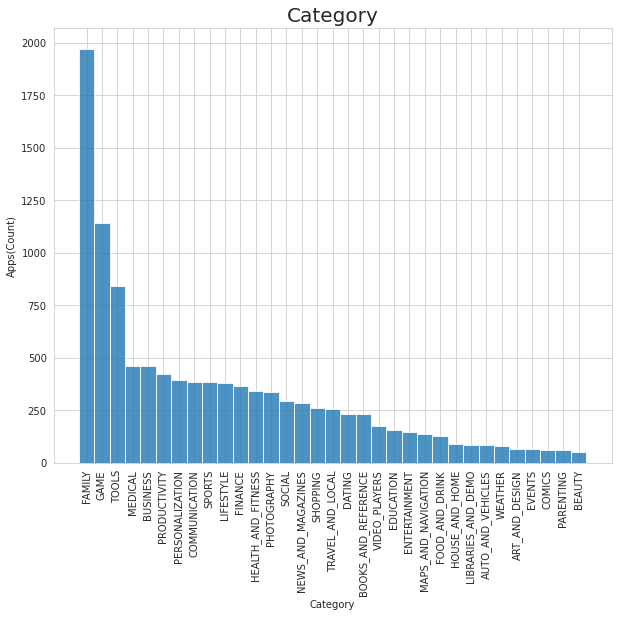

In [164]:
#Counting the number of apps in each category.
plt.figure(figsize=(10,8));
plt.bar(labels,sizes,width=1, alpha=0.8);
plt.xticks(rotation=90)
plt.title('Category',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Category');
plt.show();


Text(0.5, 1.0, 'Total app installs in each category')

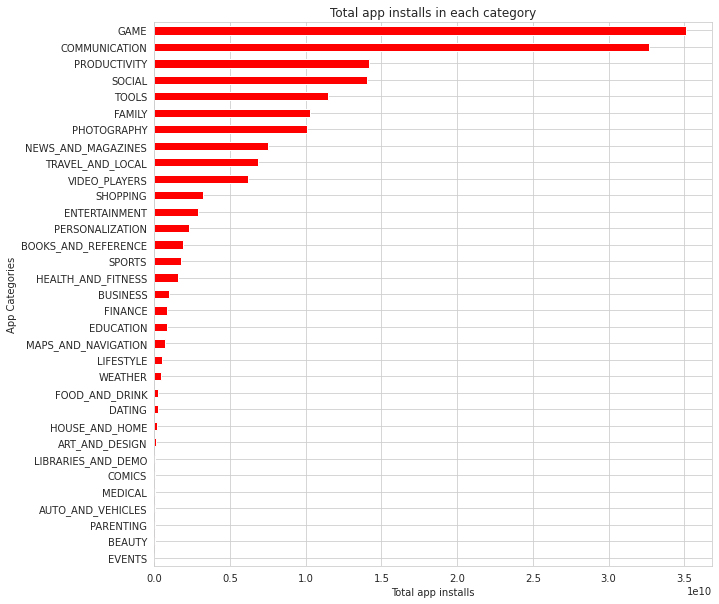

In [165]:
#no of installs in each category of apps.
grp_sum=df1.groupby('Category')['Installs'].agg(np.sum).sort_values(ascending=True)
grp_sum.plot.barh(figsize=(10,10), color = 'r')
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')



Text(0.5, 1.0, 'Average app installs.')

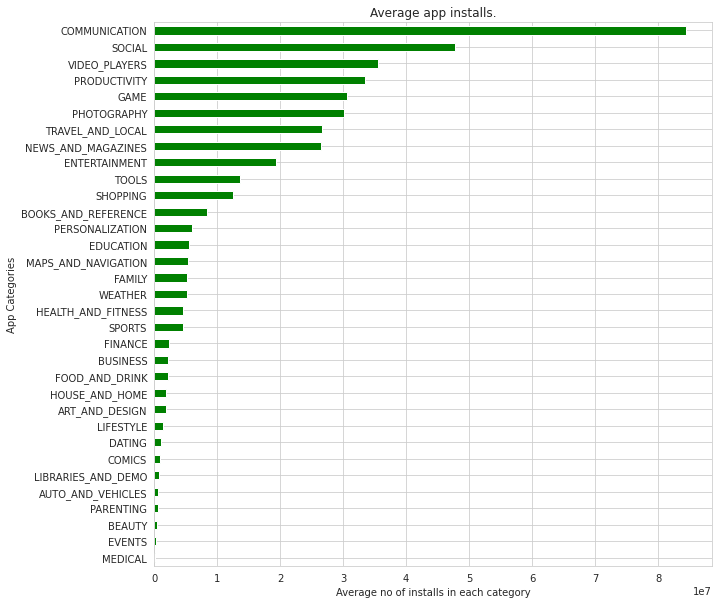

In [166]:
#sorted value of average no of installs in each category.
grp_avg=df1.groupby('Category')['Installs'].agg(np.mean).sort_values(ascending=True)
grp_avg.plot.barh(figsize=(10,10), color = 'g')
plt.ylabel('App Categories')
plt.xlabel('Average no of installs in each category')
plt.xticks()
plt.title('Average app installs.')

**From the above three plots, the conclusions we get.**


1.   The first five categories which contain the highest no of apps present in playstore are
Family , Games , Tools , Medical and Business.

      


2. The first five categories which contain the highest no of installations in playstore are
Games , Communication , Productivity , Social and Tools. 

3.   The first five categories which contain the highest average no of installs in playstore are
Communication  , Social , Video players , Productivity and Games.



**   `Communication  , Social , Video players , Productivity and Games `categories contain the higher percentage of installation with respect to no of apps . So deploying apps in that categories may result in success.**







  



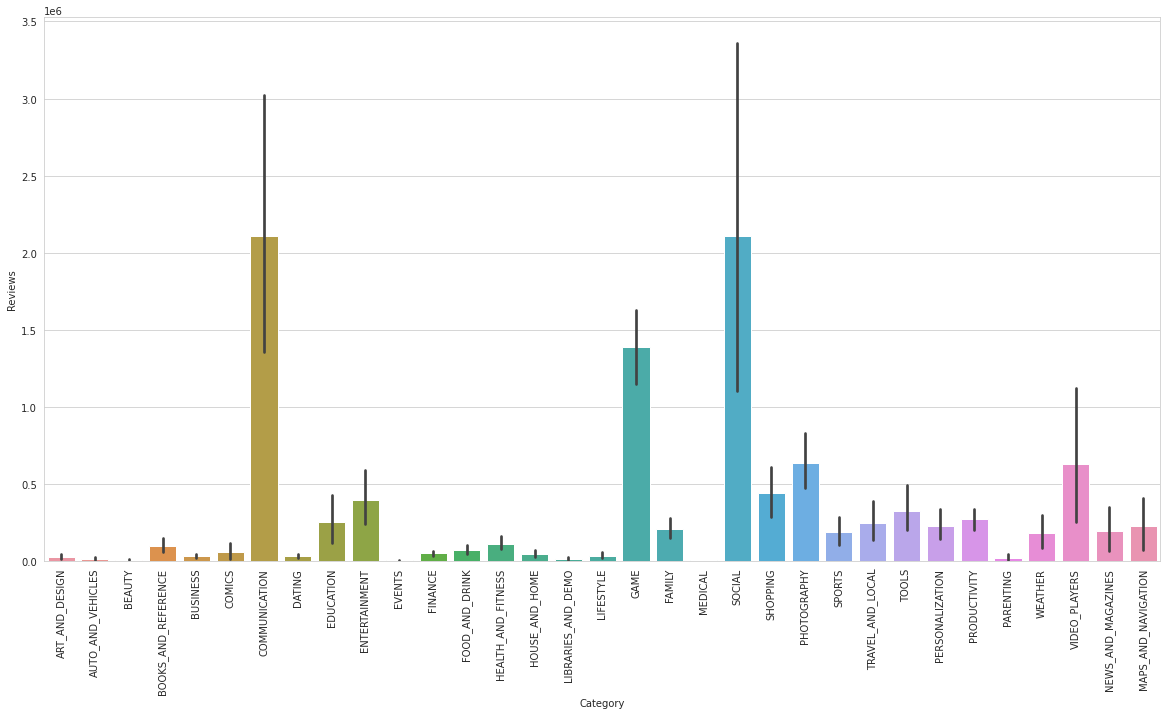

In [167]:
#Barplot representing number of reviews in each category.
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Category', y='Reviews',data=df1 ,ax=ax);
plt.xticks(rotation=90);


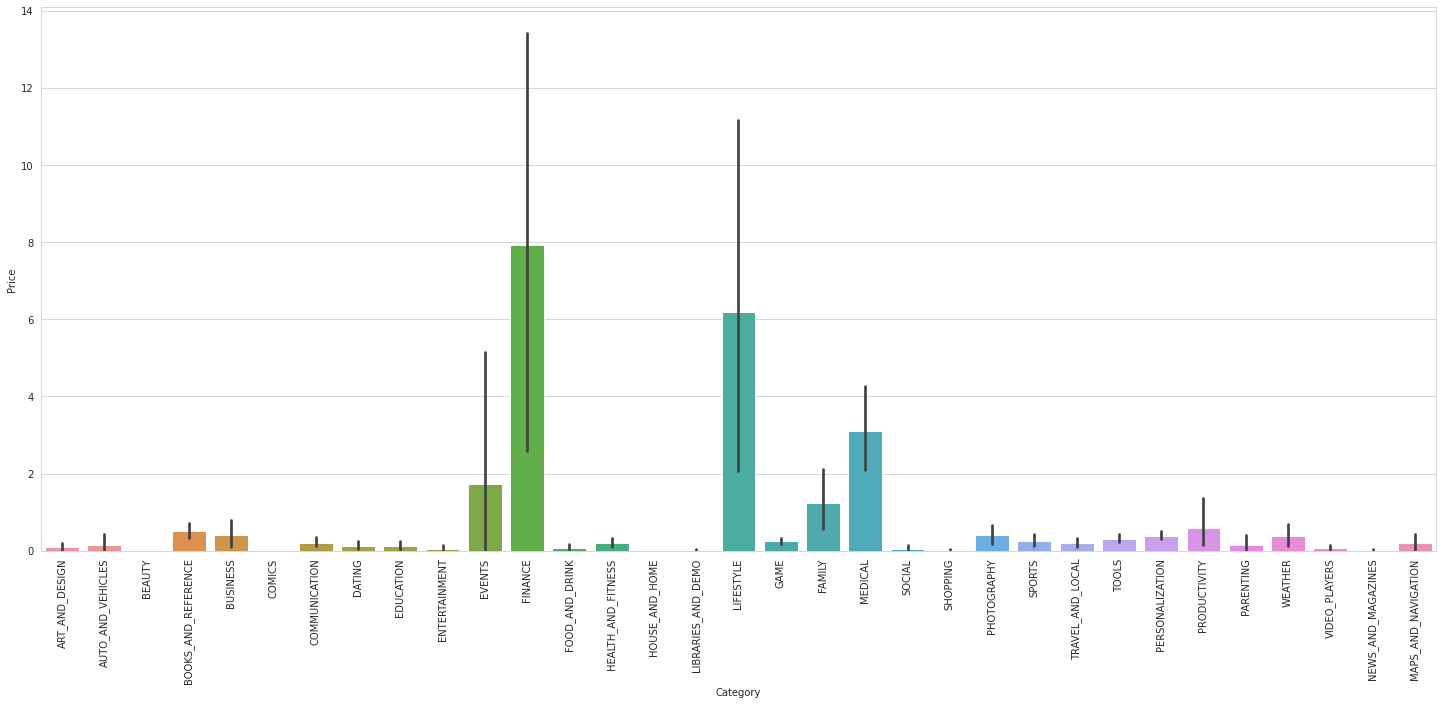

In [168]:
#Which category contains the expensive apps.
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='Category', y='Price',data=df1 ,ax=ax);
plt.xticks(rotation=90);




*   From the above two graphs we can conclude that,


1.   The `Social` , `communication` and `Game` categories are recieving more reviews.
2.   Most expensive apps are in the genres of `Finance` , `Lifestyle`
and `medical`.




**3.Finding out how rating of apps are influenced by other factors.**

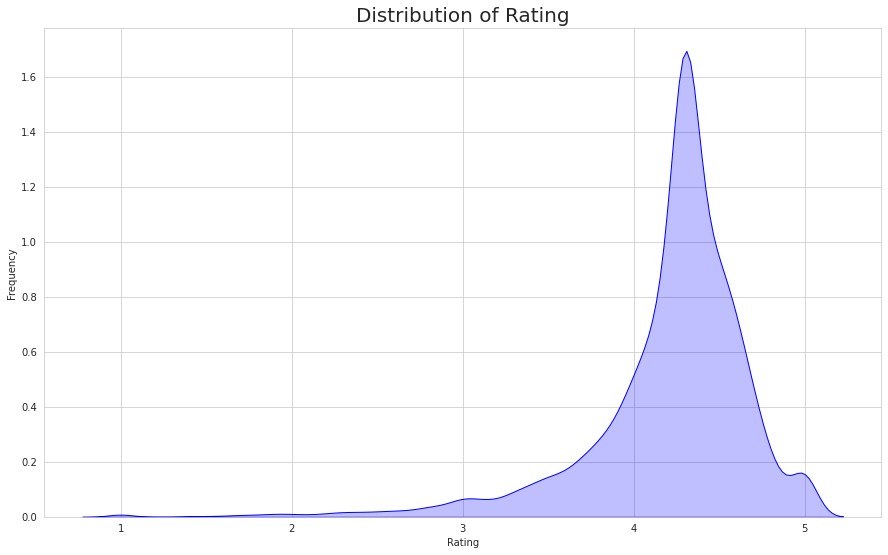

In [169]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df1.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

From the app we get to know that majority apps are rated between 4 and 5.

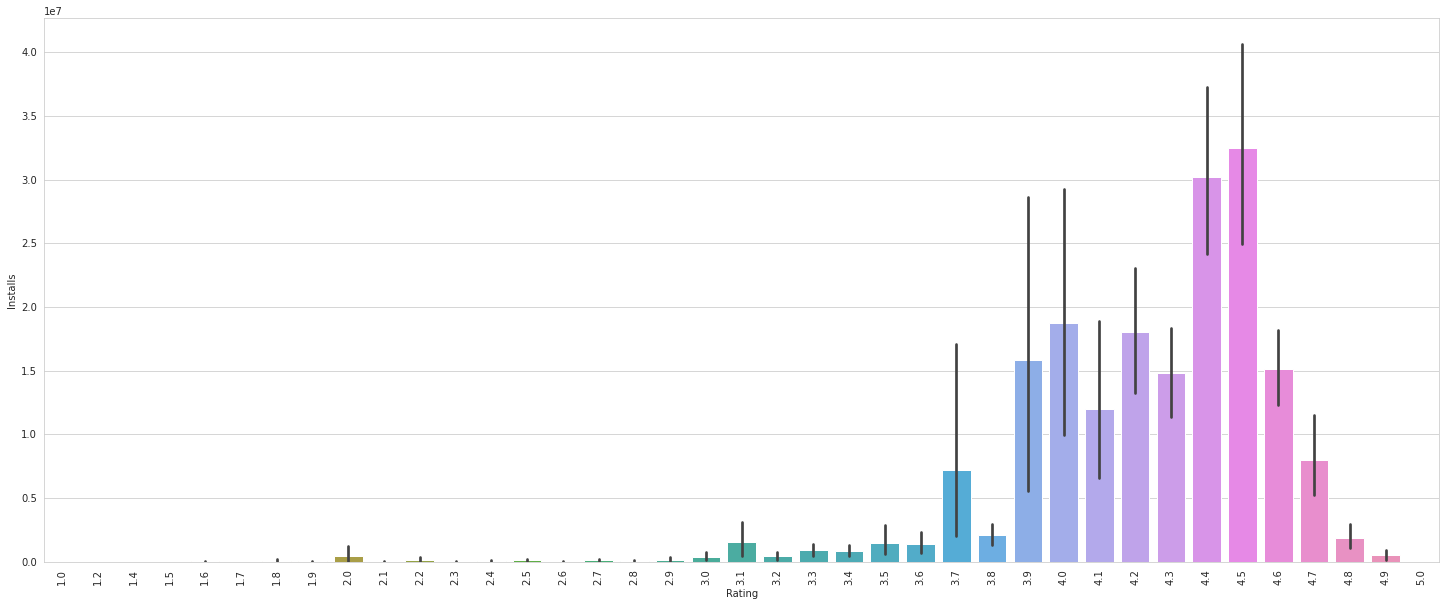

In [170]:
#Rating vs Installs
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='Rating', y='Installs',data=df1 ,ax=ax);
plt.xticks(rotation=90);




*   Its obvious from the plot the rating is rightly skewed and as the no of installs increases rating also increase.We can conclude that more installed apps maintain there quality as aresult they recieve good rating.



**4.Type of apps .**

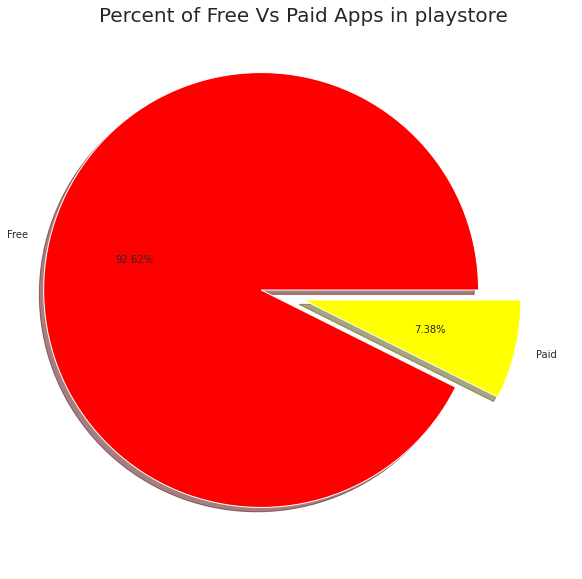

In [172]:
plt.figure(figsize=(10,10))
labels = df1.Type.value_counts(sort = True).index
sizes =df1.Type.value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.2f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in playstore',size = 20)
plt.show()




*   It's visible that almost 92.6% of apps are free and only 7.4% are paid ones.




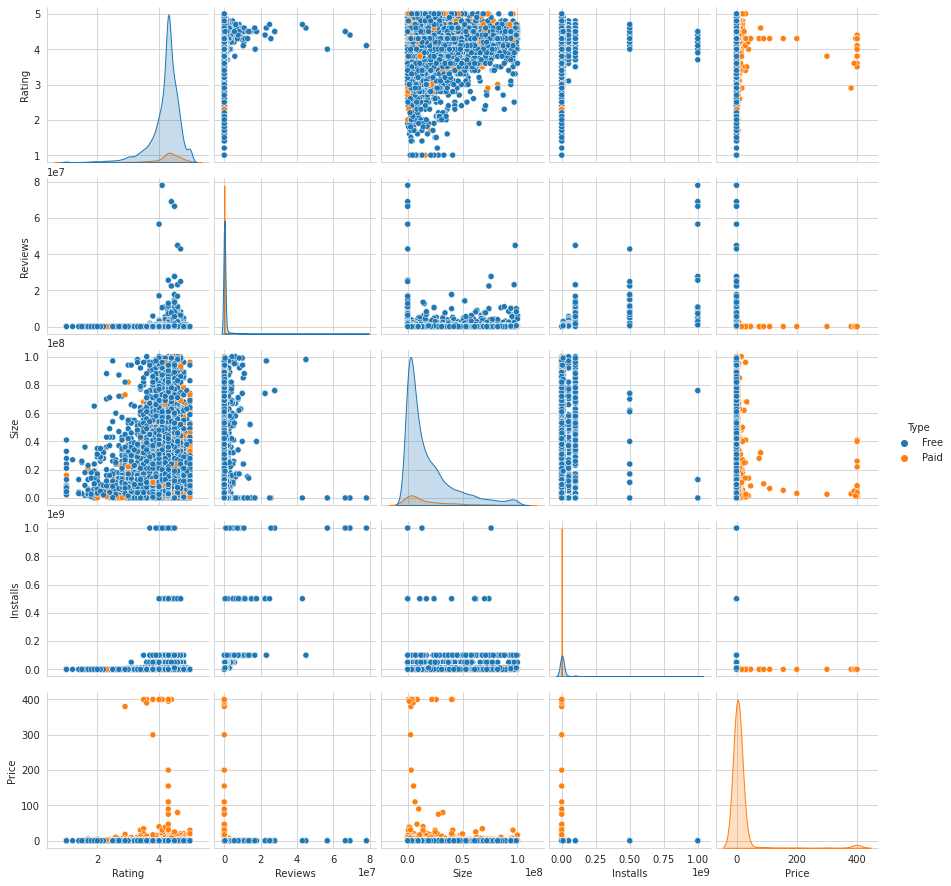

In [177]:
sns.pairplot(df1, hue ='Type') 
plt.show()

The above pairplot gives overall idea regarding how types of apps affect its popularity.

**4.Content Rating**

In [174]:
label = df1['Content Rating'].value_counts(sort = True).index
size =df1['Content Rating'].value_counts(sort = True)
labels = []
sizes = []
for i in range(len(label)):
    labels.append(label[i])
    sizes.append(size[i])

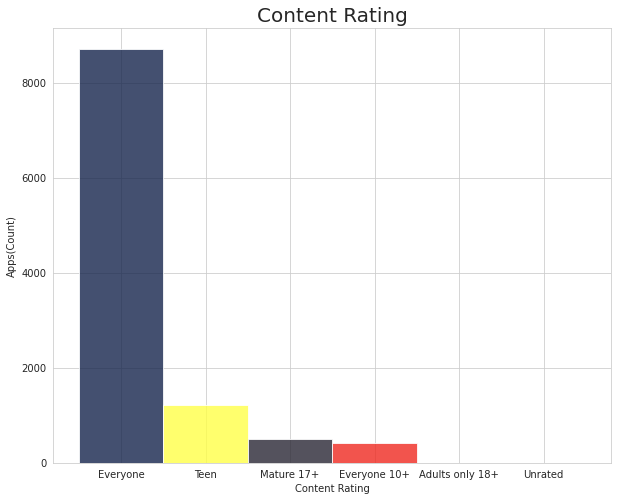

In [175]:
#plotting a barchart of content rating
plt.figure(figsize=(10,8))
plt.bar(labels,sizes,width=1,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');
plt.show();


From the above plot its clearly observable there are large number of apps under the tag Everyone(means there is no age restriction to use it)

**Do Reviews really matter for succes of app?**

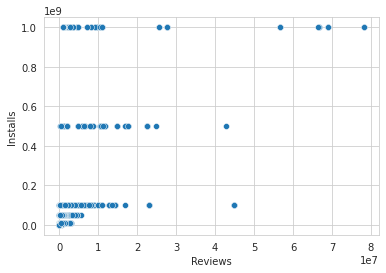

In [185]:
#Reviews vs installs
sns.scatterplot(x="Reviews", y="Installs", data=df1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


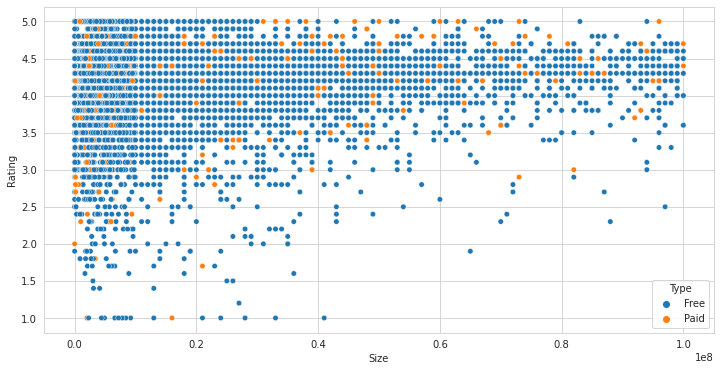

In [176]:
plt.figure(figsize=(12, 6));
sns.scatterplot(df1['Size'],df1['Rating'],hue=df1['Type'],s=30);

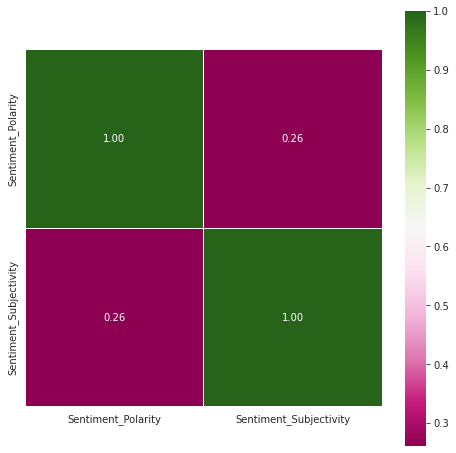

In [180]:
df2.corr()
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(),cmap="PiYG", ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

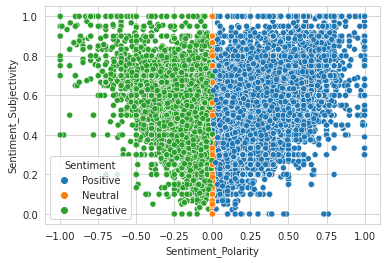

In [181]:
sns.scatterplot(data=df2,x='Sentiment_Polarity',y='Sentiment_Subjectivity', hue ='Sentiment') 
plt.show()

In [182]:
df2.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000
